In [1]:
import numpy as np
import random
import os

#   Plotting
import seaborn as sns
import matplotlib.pyplot as plt


#   DataGenerator to read images and rescale images
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import tensorflow as tf
import tensorflow_addons as tfa

#   count each class samples
from collections import Counter

#   callbacks
from tensorflow.keras.callbacks import ReduceLROnPlateau

#   evaluate precison recall and f1-score of each class of sequential_model
from sklearn.metrics import classification_report
#   Show performance of a classification sequential_model
from sklearn.metrics import confusion_matrix

#   Different layers
from keras.models import Sequential, Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import ReLU
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Softmax

# split dataset to train, validation and test set
from sklearn.model_selection import train_test_split

#   callbacks
from keras import callbacks

#   SMOTETomek from imblance library
from imblearn.combine import SMOTETomek

# ADASYN from imblance library
from imblearn.over_sampling import ADASYN


#   Optimizer
from tensorflow.keras.optimizers import SGD

from sklearn.metrics import roc_curve, auc
from itertools import cycle
from tensorflow.keras.layers import Concatenate

from tensorflow.keras.utils import plot_model


In [2]:
## Set Path Here before running the code
WORKING_DIRECTORY =  "/kaggle/input/alz-dataset/dataset"

##  Name of classes 
CLASSES = ['MildDemented',
           'ModerateDemented',
           'NonDemented',
           'VeryMildDemented']

In [3]:
X, y = [], []
height, width = 128, 128
# Images rescaling
datagen = ImageDataGenerator(rescale=1.0/255.0)
# print(datagen)

#   Load images all at once by resizing and shuffling randomly
train_dataset = datagen.flow_from_directory(WORKING_DIRECTORY, target_size=(height, width),batch_size=6400, shuffle=True)
# print(train_dataset[0])

# Seperate dataset from  Data Generator into data and labels
X, y = train_dataset.next()

Found 6400 images belonging to 4 classes.


In [4]:
print(type(X))
print(X.shape)

<class 'numpy.ndarray'>
(6400, 128, 128, 3)


In [5]:
type(train_dataset)

keras.preprocessing.image.DirectoryIterator

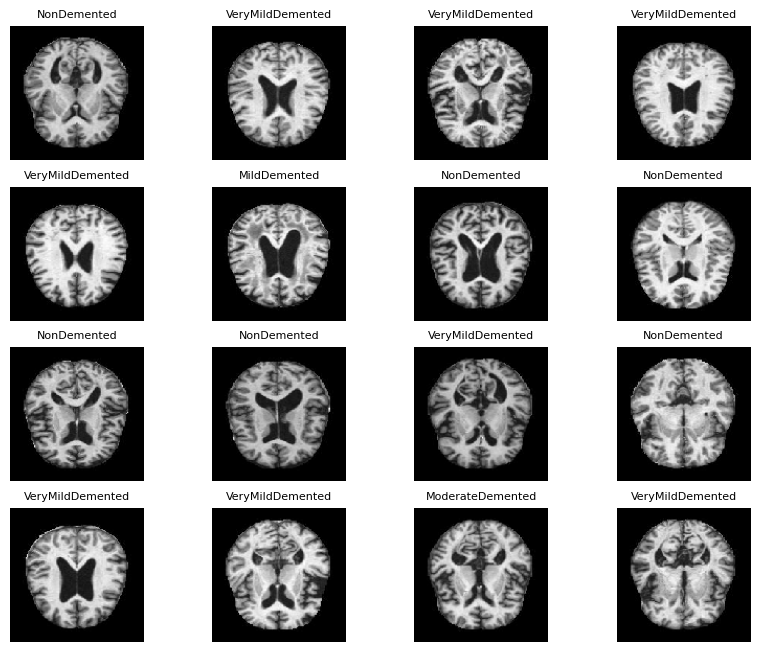

In [6]:
fig = plt.figure(figsize=(10,8))

rows = 4
columns = 4

for i in range(rows * columns):
    fig.add_subplot(rows, columns, i+1)
    num = random.randint(0, len(X)-1 )
    plt.imshow(X[num])
    plt.axis('off')
    plt.title(CLASSES[(np.argmax(y[num]))], fontsize=8)
plt.axis('off')
plt.show()

In [7]:
samples_before = len(X)
print("Images shape :\t", X.shape)
print("Labels shape :\t", y.shape)

Images shape :	 (6400, 128, 128, 3)
Labels shape :	 (6400, 4)


In [8]:
'''
#   reshaping the images to 1D
X = X.reshape(-1, width * height * 3)

#   Oversampling method to remove class imbalance problem
X, y = SMOTETomek().fit_resample(X, y)

#   reshape images to images size of 208, 176, 3
X = X.reshape(-1, width, height, 3)

samples_after = len(X)
print("Number of samples after SMOTETomek :\t", sorted(Counter(np.argmax(y, axis=1)).items()))

print(X.shape)
print(y.shape)
'''

'\n#   reshaping the images to 1D\nX = X.reshape(-1, width * height * 3)\n\n#   Oversampling method to remove class imbalance problem\nX, y = SMOTETomek().fit_resample(X, y)\n\n#   reshape images to images size of 208, 176, 3\nX = X.reshape(-1, width, height, 3)\n\nsamples_after = len(X)\nprint("Number of samples after SMOTETomek :\t", sorted(Counter(np.argmax(y, axis=1)).items()))\n\nprint(X.shape)\nprint(y.shape)\n'

In [9]:

adasyn = ADASYN(random_state=42)
num_samples, width, height, channels = X.shape
flattened_shape = width * height * channels

X = X.reshape(-1, flattened_shape)

X, y = adasyn.fit_resample(X, y)

#   reshape images to images size of 208, 176, 3
X = X.reshape(-1, width, height, channels)




In [10]:
samples_after = len(X)

In [11]:
print(X.shape)

(12765, 128, 128, 3)


In [12]:
print("Number of samples after ADASYN :\t", sorted(Counter(np.argmax(y, axis=1)).items()))

Number of samples after ADASYN :	 [(0, 3184), (1, 3199), (2, 3200), (3, 3182)]


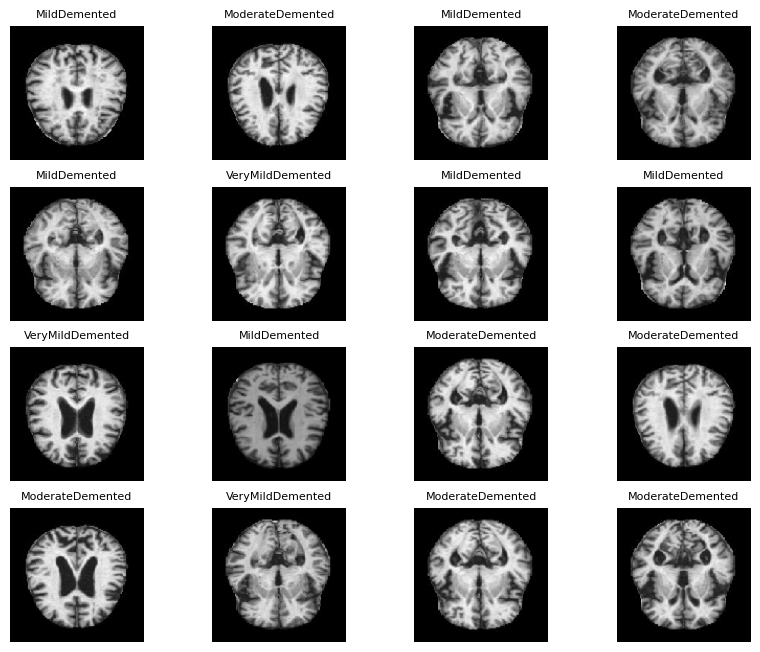

In [13]:
fig = plt.figure(figsize=(10,8))

rows = 4
columns = 4

for i in range(rows * columns):
    fig.add_subplot(rows, columns, i+1)
    num = random.randint(samples_before, samples_after - 1 ) # At each iteration, generate a random index to show sample
    plt.imshow(X[num]) # Show the sample
    plt.axis('off')
    plt.title(CLASSES[(np.argmax(y[num]))], fontsize=8) # Add the class
plt.axis('off')
plt.show()

In [14]:
# Data shuffled while loaded so no shuffling is done while splitting data.
# 80% training data, 20 % validation data
X_train, x_val, y_train, y_val = train_test_split(X, y, test_size = 0.2 )

# Out of 80% training data, 20 % are taken as test data, remaining 60 % will serve as training data
X_train, x_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.2 )


In [15]:
del X,y

In [16]:
print(y_train)

[[0 0 0 1]
 [1 0 0 0]
 [1 0 0 0]
 ...
 [0 1 0 0]
 [0 0 0 1]
 [0 0 1 0]]


In [17]:
# Number of samples after train test split
print("Number of samples after splitting into Training, validation & test set\n")

print("Train     \t",sorted(Counter(np.argmax(y_train, axis=1)).items()))
print("Validation\t",sorted(Counter(np.argmax(y_val, axis=1)).items()))
print("Test      \t",sorted(Counter(np.argmax(y_test, axis=1)).items()))

Number of samples after splitting into Training, validation & test set

Train     	 [(0, 2043), (1, 2016), (2, 2063), (3, 2047)]
Validation	 [(0, 621), (1, 649), (2, 632), (3, 651)]
Test      	 [(0, 520), (1, 534), (2, 505), (3, 484)]


In [18]:
from keras.initializers import GlorotUniformV2
init = GlorotUniformV2

In [19]:
def create_feature_extractor(shared_input_layer, kernel_size):
    x = shared_input_layer
    units = [16, 32, 64, 128]
    for unit in units:
        x = Convolution2D(unit, kernel_size=kernel_size, kernel_initializer=init, padding='same')(x)
        x = AveragePooling2D(pool_size=(2, 2))(x)
        x = ReLU()(x)
    x = Dropout(0.01)(x)
    x = Flatten()(x)
    return x


In [20]:
input_layer = Input(shape=(128, 128, 3))

In [21]:
# Create feature extractors that share the input layer

# Create the first feature extractor with kernel size 5
feature_extractor1 = create_feature_extractor(input_layer, kernel_size=(5, 5))

# Create the second feature extractor with kernel size 12
feature_extractor2 = create_feature_extractor(input_layer, kernel_size=(12, 12))


In [22]:
merged_feature_extractors = Concatenate()([feature_extractor1, feature_extractor2])

In [23]:
dense_layer1 = Dense(256, kernel_initializer=init)(merged_feature_extractors)
activation_layer = ReLU()(dense_layer1)
dense_layer2 = Dense(4,kernel_initializer=init)(activation_layer)
output_layer = Softmax()(dense_layer2)

In [24]:
model = Model(inputs = input_layer, outputs = output_layer)

print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 128, 128, 16  1216        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_4 (Conv2D)              (None, 128, 128, 16  6928        ['input_1[0][0]']                
                                )                                                             

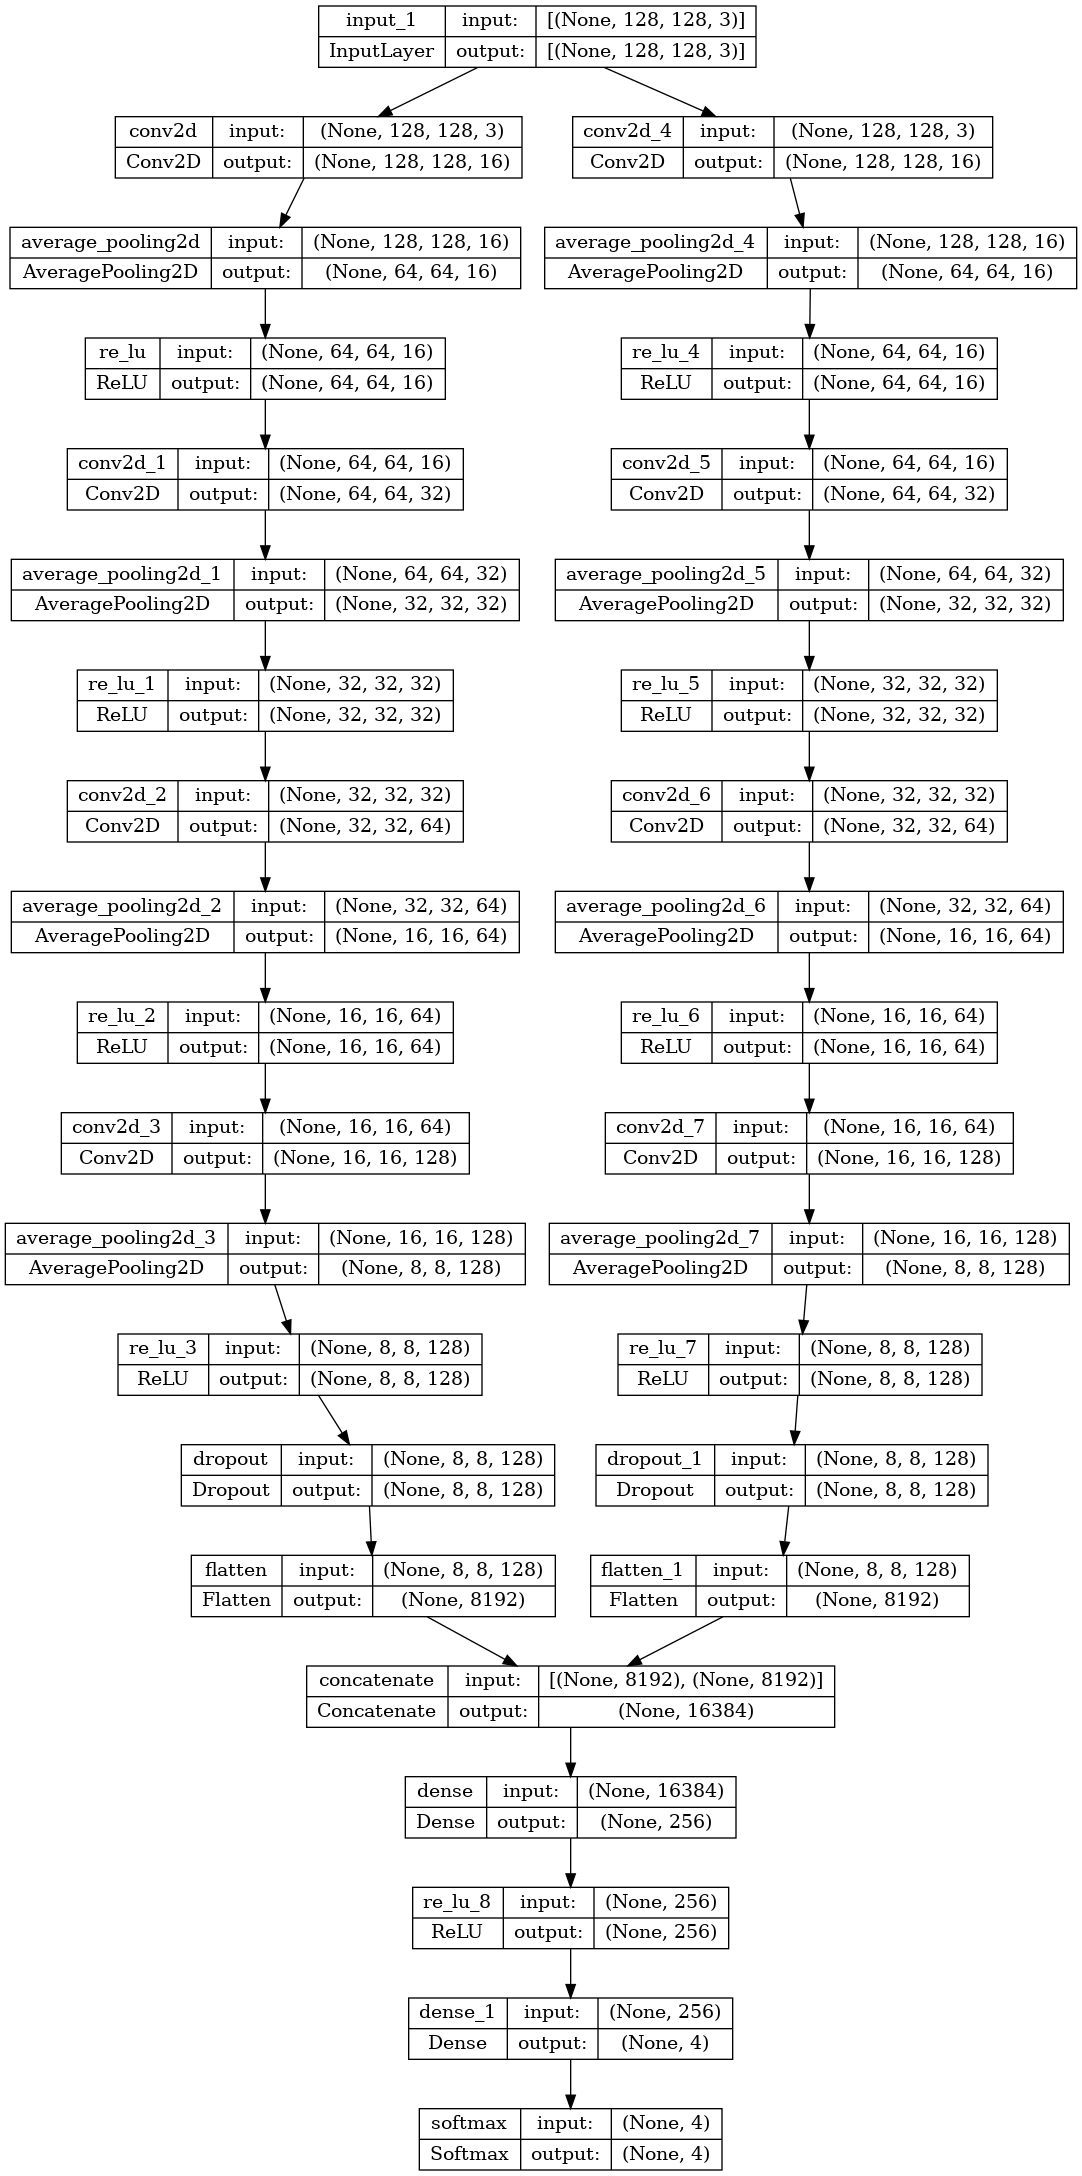

In [25]:
# plot graph
plot_model(model, to_file='shared_input_layer.png', show_shapes=True)

In [26]:
print(type(model))

<class 'keras.engine.functional.Functional'>


In [27]:
### model Compilation
model.compile(
    optimizer=SGD(learning_rate=0.01), 
    loss = tf.keras.losses.CategoricalCrossentropy(name='loss'), 
    metrics=[
        tf.keras.metrics.CategoricalAccuracy(name='acc'), 
        tf.keras.metrics.AUC(name='auc'),
        tfa.metrics.F1Score(num_classes=4),
        tf.metrics.Precision(name="precision"),
        tf.metrics.Recall(name="recall") ])

In [28]:
# callbacks used in sequential_model to perform well
rop_callback = ReduceLROnPlateau(monitor="val_loss", patience=2)

CALLBACKS = [rop_callback]

In [29]:
#   declare to run on small gpu create batch sizes of images
valAug = ImageDataGenerator()

#   defining batch size
batch_size = 20
history = model.fit(valAug.flow(X_train, y_train, batch_size=batch_size, shuffle = True),
steps_per_epoch=len(X_train) // batch_size,
validation_data=valAug.flow(x_val, y_val, batch_size=batch_size, shuffle = True),
validation_steps=len(x_test) // batch_size,
epochs= 40,
batch_size=batch_size,
callbacks = CALLBACKS
)

Epoch 1/40
408/408 [==============================] - 29s 37ms/step - loss: 1.2734 - acc: 0.3764 - auc: 0.6650 - f1_score: 0.3671 - precision: 0.6288 - recall: 0.0713 - val_loss: 1.0606 - val_acc: 0.5069 - val_auc: 0.8078 - val_f1_score: 0.3944 - val_precision: 0.5878 - val_recall: 0.4446 - lr: 0.0100
Epoch 2/40
408/408 [==============================] - 15s 36ms/step - loss: 0.8395 - acc: 0.6008 - auc: 0.8673 - f1_score: 0.5926 - precision: 0.7358 - recall: 0.4408 - val_loss: 0.7537 - val_acc: 0.6500 - val_auc: 0.8976 - val_f1_score: 0.6478 - val_precision: 0.8214 - val_recall: 0.4779 - lr: 0.0100
Epoch 3/40
408/408 [==============================] - 14s 35ms/step - loss: 0.6889 - acc: 0.6757 - auc: 0.9103 - f1_score: 0.6722 - precision: 0.7680 - recall: 0.5538 - val_loss: 0.8007 - val_acc: 0.6564 - val_auc: 0.8887 - val_f1_score: 0.6537 - val_precision: 0.7713 - val_recall: 0.4843 - lr: 0.0100
Epoch 4/40
408/408 [==============================] - 14s 35ms/step - loss: 0.6213 - acc: 0

In [30]:
### Evaluate sequential_model
test_scores = model.evaluate(x_test, y_test, batch_size = 32)


print("\n\nTesting Loss : \t\t {0:0.6f}".format(test_scores[0] ))
print("Testing Accuracy : \t {0:0.6f} %".format(test_scores[1] * 100))
print("Testing AC : \t\t {0:0.6f} %".format(test_scores[2] * 100))
print("Testing F1-Score : \t {0:0.6f} %".format(((test_scores[3][0] + test_scores[3][1] + test_scores[3][2] + test_scores[3][3])/4) * 100))
print("Testing Precision : \t {0:0.6f} %".format(test_scores[4] * 100))
print("Testing Recall : \t {0:0.6f} %".format(test_scores[5] * 100))

64/64 [==============================] - 2s 24ms/step - loss: 0.0860 - acc: 0.9770 - auc: 0.9966 - f1_score: 0.9764 - precision: 0.9803 - recall: 0.9765


Testing Loss : 		 0.085972
Testing Accuracy : 	 97.699463 %
Testing AC : 		 99.659079 %
Testing F1-Score : 	 97.644198 %
Testing Precision : 	 98.034400 %
Testing Recall : 	 97.650516 %
